# Data Preparation

#### Below we remove all players that do not have a salary for the 2020-21 year and players that show NaNs for this year. 

In [1]:
# Import needed libraries

from matplotlib import pyplot as plt
from scipy import stats
import seaborn as sns
import numpy as np
import pandas as pd
import datetime
import pickle

sns.set_style("darkgrid")
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 999)

import warnings
warnings.filterwarnings('ignore')

In [2]:
# pickle_in = open("data/final_df.csv","rb")
# rosters = pickle.load(pickle_in)

rosters = pd.read_csv('data/final_df.csv')

In [3]:
final_df = rosters[rosters['Salary_2020-21'] != 0.0]
final_df = final_df[final_df['Salary_2020-21'].notna()]
final_df.head()

,Unnamed: 0,fullName,id,jerseyNumber,code,name,type,abbreviation,Team_Number,birthDate,currentAge,birthCity,birthStateProvince,birthCountry,nationality,height,weight,active,alternateCaptain,captain,rookie,shootsCatches,rosterStatus,season20,timeOnIce20,assists20,goals20,pim20,shots20,games20,hits20,powerPlayGoals20,powerPlayPoints20,powerPlayTimeOnIce20,evenTimeOnIce20,penaltyMinutes20,faceOffPct20,shotPct20,gameWinningGoals20,overTimeGoals20,shortHandedGoals20,shortHandedPoints20,shortHandedTimeOnIce20,blocked20,plusMinus20,points20,shifts20,timeOnIcePerGame20,evenTimeOnIcePerGame20,shortHandedTimeOnIcePerGame20,powerPlayTimeOnIcePerGame20,ot20,shutouts20,ties20,wins20,losses20,saves20,powerPlaySaves20,shortHandedSaves20,evenSaves20,shortHandedShots20,evenShots20,powerPlayShots20,savePercentage20,goalAgainstAverage20,gamesStarted20,shotsAgainst20,goalsAgainst20,powerPlaySavePercentage20,shortHandedSavePercentage20,evenStrengthSavePercentage20,season19,timeOnIce19,assists19,goals19,pim19,shots19,games19,hits19,powerPlayGoals19,powerPlayPoints19,powerPlayTimeOnIce19,evenTimeOnIce19,penaltyMinutes19,faceOffPct19,shotPct19,gameWinningGoals19,overTimeGoals19,shortHandedGoals19,shortHandedPoints19,shortHandedTimeOnIce19,blocked19,plusMinus19,points19,shifts19,timeOnIcePerGame19,evenTimeOnIcePerGame19,shortHandedTimeOnIcePerGame19,powerPlayTimeOnIcePerGame19,ot19,shutouts19,ties19,wins19,losses19,saves19,powerPlaySaves19,shortHandedSaves19,evenSaves19,shortHandedShots19,evenShots19,powerPlayShots19,savePercentage19,goalAgainstAverage19,gamesStarted19,shotsAgainst19,goalsAgainst19,powerPlaySavePercentage19,shortHandedSavePercentage19,evenStrengthSavePercentage19,season18,timeOnIce18,assists18,goals18,pim18,shots18,games18,hits18,powerPlayGoals18,powerPlayPoints18,powerPlayTimeOnIce18,evenTimeOnIce18,penaltyMinutes18,faceOffPct18,shotPct18,gameWinningGoals18,overTimeGoals18,shortHandedGoals18,shortHandedPoints18,shortHandedTimeOnIce18,blocked18,plusMinus18,points18,shifts18,timeOnIcePerGame18,evenTimeOnIcePerGame18,shortHandedTimeOnIcePerGame18,powerPlayTimeOnIcePerGame18,ot18,shutouts18,ties18,wins18,losses18,saves18,powerPlaySaves18,shortHandedSaves18,evenSaves18,shortHandedShots18,evenShots18,powerPlayShots18,savePercentage18,goalAgainstAverage18,gamesStarted18,shotsAgainst18,goalsAgainst18,powerPlaySavePercentage18,shortHandedSavePercentage18,evenStrengthSavePercentage18,season17,timeOnIce17,assists17,goals17,pim17,shots17,games17,hits17,powerPlayGoals17,powerPlayPoints17,powerPlayTimeOnIce17,evenTimeOnIce17,penaltyMinutes17,faceOffPct17,shotPct17,gameWinningGoals17,overTimeGoals17,shortHandedGoals17,shortHandedPoints17,shortHandedTimeOnIce17,blocked17,plusMinus17,points17,shifts17,timeOnIcePerGame17,evenTimeOnIcePerGame17,shortHandedTimeOnIcePerGame17,powerPlayTimeOnIcePerGame17,ot17,shutouts17,wins17,losses17,saves17,powerPlaySaves17,shortHandedSaves17,evenSaves17,shortHandedShots17,evenShots17,powerPlayShots17,savePercentage17,goalAgainstAverage17,gamesStarted17,shotsAgainst17,goalsAgainst17,powerPlaySavePercentage17,shortHandedSavePercentage17,evenStrengthSavePercentage17,season16,timeOnIce16,assists16,goals16,pim16,shots16,games16,hits16,powerPlayGoals16,powerPlayPoints16,powerPlayTimeOnIce16,evenTimeOnIce16,penaltyMinutes16,faceOffPct16,shotPct16,gameWinningGoals16,overTimeGoals16,shortHandedGoals16,shortHandedPoints16,shortHandedTimeOnIce16,blocked16,plusMinus16,points16,shifts16,timeOnIcePerGame16,evenTimeOnIcePerGame16,shortHandedTimeOnIcePerGame16,powerPlayTimeOnIcePerGame16,ot16,shutouts16,wins16,losses16,saves16,powerPlaySaves16,shortHandedSaves16,evenSaves16,shortHandedShots16,evenShots16,powerPlayShots16,savePercentage16,goalAgainstAverage16,gamesStarted16,shotsAgainst16,goalsAgainst16,powerPlaySavePercentage16,shortHandedSavePercentage16,evenStrengthSavePercentage16,season15,timeOnIce15,assists15,goals15,pim15,shots15,games15,hits15,powerPlayGoals15,powerPlayPoints15,powerPlayTimeOnIce15,evenTimeOnIce15,penaltyMinut

In [4]:
len(final_df)

529

#### Before we start analyzing our data, we already know that since the stats vary drastically between goalies and players that we are only going to focus on player salaries. At this point we can drop all goalies from our dataframe.

In [5]:
final_df = final_df[final_df['name'] != 'Goalie']
final_df_goalies = final_df[final_df['name'] == 'Goalie']

#### Below we will review our NA counts and start cleaning our dataframe. 

In [6]:
final_df.isna().sum()

Unnamed: 0                         0
fullName                           0
id                                 0
jerseyNumber                       1
code                               0
name                               0
type                               0
abbreviation                       0
Team_Number                        0
birthDate                          0
currentAge                         0
birthCity                          0
birthStateProvince               138
birthCountry                       0
nationality                        0
height                             0
weight                             0
active                             0
alternateCaptain                   0
captain                            0
rookie                             0
shootsCatches                      0
rosterStatus                       0
season20                          49
timeOnIce20                       49
assists20                         49
goals20                           49
p

#### Thats a lot of NA values. To start, we can identify the goalie specific columns and drop them from our data. Below we will start this process. 

In [7]:
goalie_drop_col = ['ot',
                    'shutouts',
                    'wins',
                    'losses',
                    'saves',
                    'powerPlaySaves',
                    'shortHandedSaves',
                    'evenSaves',
                    'shortHandedShots',
                    'evenShots',
                    'powerPlayShots',
                    'savePercentage',
                    'goalAgainstAverage',
                    'gamesStarted',
                    'shotsAgainst',
                    'goalsAgainst',
                    'powerPlaySavePercentage',
                    'shortHandedSavePercentage',
                    'evenStrengthSavePercentage']

#### Above we manually identified our goalie specific columns. Since we added our years as a suffix to each column we will need to iterate through our dataframe to drop these columns. 

In [8]:
years = ['14','15','16','17','18','19','20']

for year in years:
    for col in goalie_drop_col:
        final_df.drop(f'{col}{year}', axis=1, inplace=True)

In [9]:
final_df.isna().sum()

Unnamed: 0                         0
fullName                           0
id                                 0
jerseyNumber                       1
code                               0
name                               0
type                               0
abbreviation                       0
Team_Number                        0
birthDate                          0
currentAge                         0
birthCity                          0
birthStateProvince               138
birthCountry                       0
nationality                        0
height                             0
weight                             0
active                             0
alternateCaptain                   0
captain                            0
rookie                             0
shootsCatches                      0
rosterStatus                       0
season20                          49
timeOnIce20                       49
assists20                         49
goals20                           49
p

#### Not quite as long but we still have a lot of work to do. Lets visually look at our dataframe and see if we can visually identify any columns that serve us no purpose in our model building process.

In [10]:
final_df = final_df.reset_index()
final_df.head()

,index,Unnamed: 0,fullName,id,jerseyNumber,code,name,type,abbreviation,Team_Number,birthDate,currentAge,birthCity,birthStateProvince,birthCountry,nationality,height,weight,active,alternateCaptain,captain,rookie,shootsCatches,rosterStatus,season20,timeOnIce20,assists20,goals20,pim20,shots20,games20,hits20,powerPlayGoals20,powerPlayPoints20,powerPlayTimeOnIce20,evenTimeOnIce20,penaltyMinutes20,faceOffPct20,shotPct20,gameWinningGoals20,overTimeGoals20,shortHandedGoals20,shortHandedPoints20,shortHandedTimeOnIce20,blocked20,plusMinus20,points20,shifts20,timeOnIcePerGame20,evenTimeOnIcePerGame20,shortHandedTimeOnIcePerGame20,powerPlayTimeOnIcePerGame20,ties20,season19,timeOnIce19,assists19,goals19,pim19,shots19,games19,hits19,powerPlayGoals19,powerPlayPoints19,powerPlayTimeOnIce19,evenTimeOnIce19,penaltyMinutes19,faceOffPct19,shotPct19,gameWinningGoals19,overTimeGoals19,shortHandedGoals19,shortHandedPoints19,shortHandedTimeOnIce19,blocked19,plusMinus19,points19,shifts19,timeOnIcePerGame19,evenTimeOnIcePerGame19,shortHandedTimeOnIcePerGame19,powerPlayTimeOnIcePerGame19,ties19,season18,timeOnIce18,assists18,goals18,pim18,shots18,games18,hits18,powerPlayGoals18,powerPlayPoints18,powerPlayTimeOnIce18,evenTimeOnIce18,penaltyMinutes18,faceOffPct18,shotPct18,gameWinningGoals18,overTimeGoals18,shortHandedGoals18,shortHandedPoints18,shortHandedTimeOnIce18,blocked18,plusMinus18,points18,shifts18,timeOnIcePerGame18,evenTimeOnIcePerGame18,shortHandedTimeOnIcePerGame18,powerPlayTimeOnIcePerGame18,ties18,season17,timeOnIce17,assists17,goals17,pim17,shots17,games17,hits17,powerPlayGoals17,powerPlayPoints17,powerPlayTimeOnIce17,evenTimeOnIce17,penaltyMinutes17,faceOffPct17,shotPct17,gameWinningGoals17,overTimeGoals17,shortHandedGoals17,shortHandedPoints17,shortHandedTimeOnIce17,blocked17,plusMinus17,points17,shifts17,timeOnIcePerGame17,evenTimeOnIcePerGame17,shortHandedTimeOnIcePerGame17,powerPlayTimeOnIcePerGame17,season16,timeOnIce16,assists16,goals16,pim16,shots16,games16,hits16,powerPlayGoals16,powerPlayPoints16,powerPlayTimeOnIce16,evenTimeOnIce16,penaltyMinutes16,faceOffPct16,shotPct16,gameWinningGoals16,overTimeGoals16,shortHandedGoals16,shortHandedPoints16,shortHandedTimeOnIce16,blocked16,plusMinus16,points16,shifts16,timeOnIcePerGame16,evenTimeOnIcePerGame16,shortHandedTimeOnIcePerGame16,powerPlayTimeOnIcePerGame16,season15,timeOnIce15,assists15,goals15,pim15,shots15,games15,hits15,powerPlayGoals15,powerPlayPoints15,powerPlayTimeOnIce15,evenTimeOnIce15,penaltyMinutes15,faceOffPct15,shotPct15,gameWinningGoals15,overTimeGoals15,shortHandedGoals15,shortHandedPoints15,shortHandedTimeOnIce15,blocked15,plusMinus15,points15,shifts15,timeOnIcePerGame15,evenTimeOnIcePerGame15,shortHandedTimeOnIcePerGame15,powerPlayTimeOnIcePerGame15,season14,timeOnIce14,assists14,goals14,pim14,shots14,games14,hits14,powerPlayGoals14,powerPlayPoints14,powerPlayTimeOnIce14,evenTimeOnIce14,penaltyMinutes14,faceOffPct14,shotPct14,gameWinningGoals14,overTimeGoals14,shortHandedGoals14,shortHandedPoints14,shortHandedTimeOnIce14,blocked14,plusMinus14,points14,shifts14,timeOnIcePerGame14,evenTimeOnIcePerGame14,shortHandedTimeOnIcePerGame14,powerPlayTimeOnIcePerGame14,Salary_2014-15,Salary_2015-16,Salary_2016-17,Salary_2017-18,Salary_2018-19,Salary_2019-20,Salary_2020-21
0,2,2,P.K. Subban,8474056,76.0,D,Defenseman,Defenseman,D,1,1989-05-13,32,Toronto,ON,CAN,CAN,"6' 0""",210,True,True,False,False,R,Y,20192020.0,1504:25,11.0,7.0,79.0,151.0,68.0,88.0,2.0,6.0,160:14,1232:41,79.0,0.0,4.6,3.0,0.0,0.0,0.0,111:30,90.0,-21.0,18.0,1883.0,22:07,18:07,01:38,02:21,NaN,20182019.0,1427:51,22.0,9.0,60.0,168.0,63.0,56.0,2.0,10.0,163:07,1166:17,60.0,0.0,5.36,1.0,0.0,1.0,1.0,98:27,75.0,5.0,31.0,1731.0,22:39,18:30,01:33,02:35,NaN,20172018.0,1977:24,43.0,16.0,82.0,207.0,82.0,111.0,5.0,25.0,253:23,1507:00,82.0,33.33,7.73,2.0,0.0,0.0,1.0,217:01,90.0,18.0,59.0,2323.0,24:06,18:22,02:38,03:05,NaN,20162017.0,1610:40,30.0,10.0,44.0,142.0,66.0,78.0,3.0,16.0,172:00,1300:43,44.0,0.0,7.04,2.0,0.0,0.0,1.0,1

#### Looking at the above dataframe we can identify the below column names as impractical features. 

In [11]:
manual_drop = [
    # 'fullName', # Our model will be stat based
    # 'id', # The NHL Id column - for us this is a generic field
    # 'jerseyNumber', # The number on someones back will not have any effect on performance
    # 'code', # This is a duplicate column that will be filled with the 'type' column
    # 'name', # This is a duplicate column that will be filled with the 'type' column
    # 'abbreviation', # This is a duplicate column that will be filled with the 'type' column
    # 'Team_Number', # Generic  field
    'season20', # generic field denoting the season
    'season19', # generic field denoting the season
    'season18', # generic field denoting the season
    'season17', # generic field denoting the season
    'season16', # generic field denoting the season
    'season15', # generic field denoting the season
    'season14' # generic field denoting the season    
]

final_df.drop(manual_drop, axis=1,inplace=True)

In [14]:
final_df.drop('Unnamed: 0', axis=1, inplace=True)

In [16]:
final_df.to_csv('data/cleaned_player_df_dash.csv')

In [12]:
final_df.isna().sum()

index                              0
Unnamed: 0                         0
type                               0
birthDate                          0
currentAge                         0
birthCity                          0
birthStateProvince               138
birthCountry                       0
nationality                        0
height                             0
weight                             0
active                             0
alternateCaptain                   0
captain                            0
rookie                             0
shootsCatches                      0
rosterStatus                       0
timeOnIce20                       49
assists20                         49
goals20                           49
pim20                             49
shots20                           49
games20                           49
hits20                            49
powerPlayGoals20                  49
powerPlayPoints20                 49
powerPlayTimeOnIce20              49
e

In [13]:
len(final_df)

476

#### We can see that the ties columns are 100% filled with NaN's. My assumption is that these are tied to the goalies and we missed the column above. We will drop these columns now.

In [14]:
final_df.drop(['ties20', 'ties19', 'ties18'], axis=1, inplace=True)

#### Next we have the birthStateProvince with 140 NA values. We will fill this column with the string 'unknown'.

In [15]:
final_df['birthStateProvince'] = final_df['birthStateProvince'].fillna('Unknown')

#### The next thing that catches my eye is are the salaries for years 2008-09 and 2009-10. Since the total amount is above 50% of our dataframe we will drop these columns. 

In [17]:
# final_df.drop(['2008-09', '2009-10'], axis=1, inplace=True)

#### From the 2016 back we have ~50% NA values in our columns. We will drop these columns and replace them below in our pipelines.

In [18]:
columns = ['timeOnIce',                      
            'assists',                       
            'goals',                        
            'pim',                           
            'shots',                         
            'games',                         
            'hits',                          
            'powerPlayGoals',                
            'powerPlayPoints',               
            'powerPlayTimeOnIce',            
            'evenTimeOnIce',                 
            'penaltyMinutes',                
            'faceOffPct',                    
            'shotPct',                       
            'gameWinningGoals',              
            'overTimeGoals',                 
            'shortHandedGoals',              
            'shortHandedPoints',             
            'shortHandedTimeOnIce',          
            'blocked',                       
            'plusMinus',                     
            'points',                        
            'shifts',                        
            'timeOnIcePerGame',              
            'evenTimeOnIcePerGame',         
            'shortHandedTimeOnIcePerGame',  
            'powerPlayTimeOnIcePerGame']  

years = ['14', '15', '16']

for year in years:
    for col in columns:
        final_df.drop(f'{col}{year}', axis=1, inplace=True)

In [19]:
final_df.isna().sum()

index                              0
Unnamed: 0                         0
type                               0
birthDate                          0
currentAge                         0
birthCity                          0
birthStateProvince                 0
birthCountry                       0
nationality                        0
height                             0
weight                             0
active                             0
alternateCaptain                   0
captain                            0
rookie                             0
shootsCatches                      0
rosterStatus                       0
timeOnIce20                       49
assists20                         49
goals20                           49
pim20                             49
shots20                           49
games20                           49
hits20                            49
powerPlayGoals20                  49
powerPlayPoints20                 49
powerPlayTimeOnIce20              49
e


#### To start with our data preparation, we have eight columns that are currently in the time format mm:ss. Below we start by identifying all of these columns and storing them in a list using a for loop. Again, we battle the suffix's we added while merging our tables.

In [20]:
time_col = ['timeOnIce', 'powerPlayTimeOnIce', 'evenTimeOnIce',\
            'timeOnIcePerGame', 'evenTimeOnIcePerGame','shortHandedTimeOnIce',\
           'powerPlayTimeOnIcePerGame', 'shortHandedTimeOnIcePerGame']

years = ['17','18','19','20']

time_cols = []

for col in time_col:
    for year in years:
        time_cols.append(f'{col}{year}')

#### Next we create a for loop to replace our values of ':' with '.' and creating a float object for our model to interpret. 

In [21]:
for col in time_cols:
    final_df[col] = final_df[col].astype(str)
    final_df[col] = final_df[col].apply(lambda x: x.replace(':', '.'))
    final_df[col] = final_df[col].astype(float)

#### Next, our height column denotes a player being 6'1" which is not interpretable through our model building process. Below we convert player heights from feet to inches. 

In [22]:
final_df['height'] = final_df['height'].astype(str)
final_df['height'] = final_df['height'].map(lambda x: x.rstrip('"'))
final_df['height'] = [val.split("'") for val in final_df['height']]
final_df['height'] = [(int(val[0]) * 12) + int(val[1]) for val in final_df['height']]

#### Finally, we will convert our birthDate column to the year since we dont care about what day a player was born on.

In [23]:
final_df['birthDate'] = pd.to_datetime(final_df['birthDate'])
final_df['birthDate'] = pd.DatetimeIndex(final_df['birthDate']).year.astype('int')
final_df['currentAge'] = final_df['currentAge'].astype('int')

#### To start our data preparation, lets get a visual of all stats for the 2019-20 season to see if we can identify any key features that may be present throughout the dataframe.

In [24]:
final_df.iloc[:, 15:42] = final_df.iloc[:, 15:42].astype('float')

ValueError: could not convert string to float: 'R'

In [25]:
ax = ['ax{}'.format(x) for x in range(27)]
print(ax)

['ax0', 'ax1', 'ax2', 'ax3', 'ax4', 'ax5', 'ax6', 'ax7', 'ax8', 'ax9', 'ax10', 'ax11', 'ax12', 'ax13', 'ax14', 'ax15', 'ax16', 'ax17', 'ax18', 'ax19', 'ax20', 'ax21', 'ax22', 'ax23', 'ax24', 'ax25', 'ax26']


KeyError: '2020-21'

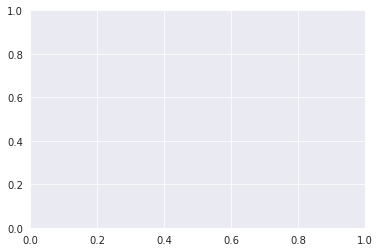

In [26]:
for col in final_df.iloc[:, 15:42].columns:
    fix, ax = plt.subplots()
    plt.scatter(final_df[col], final_df['2020-21'])
    plt.title(col)

In [ ]:
sns.scatterplot(final_df['timeOnIce20'], final_df['2020-21'])
plt.title('timeOnIce vs Salary')
plt.savefig('images/timeOnIce20');

#### Interesting insights, there doesn't seem to be a positive correlation regarding shortHandedTimeOnIce but definite positive correlation between other timeOnIce categories. Excluding timeOnIce the strongest categories showing a positive correlation with salary are points, goals, and assists. 

#### Lets take a look at some of our categorical variables to see if these shows us any other insights.

In [ ]:
for col in final_df.iloc[:, :15].columns:
    fig, ax = plt.subplots(figsize=(8,8))
    plt.scatter(final_df[col], final_df['2020-21'])
    plt.title(col)

#### This doesn't give us as much information as our numerical values but an interesting observation is that on average left handed shots look to be paid more than right handed shots. Also, it seems on average that US and Canadian nationalities get paid more than other countrys. Lets look at this further.

#### Below we can see that CHE (Switzerland), CHE (Czech), and SWE (Sweden) look to be the highest paid countries based on our top six countries that have a sizeable amount of players in the NHL.  

In [ ]:
sns.boxplot(final_df['nationality'], final_df['2020-21']);

In [ ]:
final_df['nationality'].value_counts()

In [ ]:
top_count_nations = final_df[final_df['nationality'].isin(['CAN', 'USA', 'SWE', 'RUS', 'FIN', 'CZE'])]
sns.boxplot(top_count_nations['nationality'], top_count_nations['2020-21'])
plt.savefig('images/salaries_boxplot');

In [ ]:
top_count_nations.groupby('nationality')['2020-21'].mean().sort_values(ascending=False)

#### Lets see who the top players are for each country.

In [ ]:
sns.boxplot(final_df['shootsCatches'], final_df['2020-21'])
plt.savefig('images/shootsCatches_boxplot');

In [ ]:
final_df.to_csv('data/cleaned_players_df.csv')
final_df_goalies.to_csv('data/dirty_goalies_df.csv')

In [28]:
final_df.head()

,index,Unnamed: 0,type,birthDate,currentAge,birthCity,birthStateProvince,birthCountry,nationality,height,weight,active,alternateCaptain,captain,rookie,shootsCatches,rosterStatus,timeOnIce20,assists20,goals20,pim20,shots20,games20,hits20,powerPlayGoals20,powerPlayPoints20,powerPlayTimeOnIce20,evenTimeOnIce20,penaltyMinutes20,faceOffPct20,shotPct20,gameWinningGoals20,overTimeGoals20,shortHandedGoals20,shortHandedPoints20,shortHandedTimeOnIce20,blocked20,plusMinus20,points20,shifts20,timeOnIcePerGame20,evenTimeOnIcePerGame20,shortHandedTimeOnIcePerGame20,powerPlayTimeOnIcePerGame20,timeOnIce19,assists19,goals19,pim19,shots19,games19,hits19,powerPlayGoals19,powerPlayPoints19,powerPlayTimeOnIce19,evenTimeOnIce19,penaltyMinutes19,faceOffPct19,shotPct19,gameWinningGoals19,overTimeGoals19,shortHandedGoals19,shortHandedPoints19,shortHandedTimeOnIce19,blocked19,plusMinus19,points19,shifts19,timeOnIcePerGame19,evenTimeOnIcePerGame19,shortHandedTimeOnIcePerGame19,powerPlayTimeOnIcePerGame19,timeOnIce18,assists18,goals18,pim18,shots18,games18,hits18,powerPlayGoals18,powerPlayPoints18,powerPlayTimeOnIce18,evenTimeOnIce18,penaltyMinutes18,faceOffPct18,shotPct18,gameWinningGoals18,overTimeGoals18,shortHandedGoals18,shortHandedPoints18,shortHandedTimeOnIce18,blocked18,plusMinus18,points18,shifts18,timeOnIcePerGame18,evenTimeOnIcePerGame18,shortHandedTimeOnIcePerGame18,powerPlayTimeOnIcePerGame18,timeOnIce17,assists17,goals17,pim17,shots17,games17,hits17,powerPlayGoals17,powerPlayPoints17,powerPlayTimeOnIce17,evenTimeOnIce17,penaltyMinutes17,faceOffPct17,shotPct17,gameWinningGoals17,overTimeGoals17,shortHandedGoals17,shortHandedPoints17,shortHandedTimeOnIce17,blocked17,plusMinus17,points17,shifts17,timeOnIcePerGame17,evenTimeOnIcePerGame17,shortHandedTimeOnIcePerGame17,powerPlayTimeOnIcePerGame17,Salary_2014-15,Salary_2015-16,Salary_2016-17,Salary_2017-18,Salary_2018-19,Salary_2019-20,Salary_2020-21
0,2,2,Defenseman,1989,32,Toronto,ON,CAN,CAN,72,210,True,True,False,False,R,Y,1504.25,11.0,7.0,79.0,151.0,68.0,88.0,2.0,6.0,160.14,1232.41,79.0,0.0,4.6,3.0,0.0,0.0,0.0,111.30,90.0,-21.0,18.0,1883.0,22.07,18.07,1.38,2.21,1427.51,22.0,9.0,60.0,168.0,63.0,56.0,2.0,10.0,163.07,1166.17,60.0,0.0,5.36,1.0,0.0,1.0,1.0,98.27,75.0,5.0,31.0,1731.0,22.39,18.30,1.33,2.35,1977.24,43.0,16.0,82.0,207.0,82.0,111.0,5.0,25.0,253.23,1507.00,82.0,33.33,7.73,2.0,0.0,0.0,1.0,217.01,90.0,18.0,59.0,2323.0,24.06,18.22,2.38,3.05,1610.40,30.0,10.0,44.0,142.0,66.0,78.0,3.0,16.0,172.00,1300.43,44.0,0.0,7.04,2.0,0.0,0.0,1.0,137.57,104.0,-8.0,40.0,1860.0,24.24,19.42,2.05,2.36,7000000.0,7000000.0,11000000.0,11000000.0,10000000.0,10000000.0,8000000.0
1,5,5,Defenseman,1993,27,Regina,SK,CAN,CAN,73,206,True,False,False,False,L,Y,538.48,7.0,2.0,4.0,32.0,27.0,12.0,0.0,2.0,23.15,460.25,4.0,0.0,6.3,0.0,0.0,0.0,0.0,55.08,50.0,-9.0,9.0,708.0,19.57,17.03,2.02,0.51,1200.36,28.0,1.0,10.0,71.0,56.0,27.0,0.0,1.0,33.43,1025.18,10.0,0.0,1.41,0.0,0.0,0.0,0.0,141.35,93.0,20.0,29.0,1501.0,21.26,18.18,2.31,0.36,811.12,11.0,1.0,8.0,34.0,44.0,31.0,0.0,0.0,12.06,710.11,8.0,0.00,2.94,0.0,0.0,0.0,0.0,88.55,75.0,4.0,12.0,1059.0,18.26,16.08,2.01,0.16,1099.59,9.0,2.0,24.0,52.0,60.0,23.0,0.0,1.0,26.42,960.50,24.0,0.0,3.85,0.0,0.0,0.0,1.0,112.27,96.0,3.0,11.0,1463.0,18.19,16.00,1.52,0.26,0.0,0.0,0.0,0.0,0.0,4500000.0,4700000.0
2,6,6,Defenseman,1994,26,Melville,SK,CAN,CAN,74,205,True,True,False,False,R,Y,1584.26,23.0,8.0,52.0,114.0,69.0,81.0,3.0,10.0,137.22,1277.50,52.0,0.0,7.0,2.0,0.0,0.0,0.0,169.14,97.0,-20.0,31.0,1924.0,22.57,18.31,2.27,1.59,1807.31,28.0,11.0,58.0,146.0,82.0,83.0,3.0,12.0,201.51,1483.03,58.0,0.0,7.53,0.0,0.0,0.0,1.0,122.37,87.0,-27.0,39.0,2155.0,22.02,18.05,1.29,2.27,1495.40,15.0,9.0,42.0,121.0,76.0,107.0,0.0,4.0,124.24,1342.30,42.0,0.00,7.44,2.0,0.0,0.0,0.0,28.46,62.0,-8.0,24.0,1904.0,19.40,17.39,0.22,1.38,1628.11,28.0,3.0,58.0,125.0,80.0,79.0,0.0,13.0,181.27,1421.30,58.0,0.0,2.40,1.0,0.0,0.0,0.0,25.14,73.0,-31.0,31.0,2091.0,20.21,17.46,0.18,2.16,0.0,0.0,0.0,2500000.0,3000000.0,4675000.0,46750